In [1]:
from gameagent import Agent
import gym
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
env = gym.make("MountainCarContinuous-v0")
agent = Agent(2,1,train_batch_size = 640)

In [3]:
agent.main_actor.model.get_config()

{'name': 'model_3',
 'layers': [{'name': 'input_5',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_5'},
   'inbound_nodes': []},
  {'name': 'batch_normalization_5',
   'class_name': 'BatchNormalization',
   'config': {'name': 'batch_normalization_5',
    'trainable': True,
    'dtype': 'float32',
    'axis': -1,
    'momentum': 0.99,
    'epsilon': 0.001,
    'center': True,
    'scale': True,
    'beta_initializer': {'class_name': 'Zeros', 'config': {}},
    'gamma_initializer': {'class_name': 'Ones', 'config': {}},
    'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}},
    'moving_variance_initializer': {'class_name': 'Ones', 'config': {}},
    'beta_regularizer': None,
    'gamma_regularizer': None,
    'beta_constraint': None,
    'gamma_constraint': None},
   'inbound_nodes': [[['input_5', 0, 0, {}]]]},
  {'name': 'dense_11',
   'class_name': 'Dense',
   'config': {'name': 

In [4]:
epsilon = 0.999
epsilon_decaying = 0.99995
def run_episode(train = True, render = False, train_batch_size = 640,verbose = False):
    global epsilon
    global epsilon_decaying
    epsilon *= epsilon_decaying
    record = []
    done = False
    frame = env.reset()
    ep_reward = 0
    while done != True:
        if render:
            env.render()
        state = frame.reshape(1,-1)
        state = (state - env.observation_space.low) / \
                (env.observation_space.high - env.observation_space.low)
        if np.random.random() < epsilon:
            action = np.clip(agent.get_action(state) + (np.random.normal()),-1,1)
        else:
            action = agent.get_action(state)
        next_frame, reward, done, _ = env.step(action)
        if reward <100 :
            reward = -1.
        else :
            reward = 100.
        agent.memory.add(state,action,reward,next_frame.reshape(1,-1),done)
        ep_reward += reward
        frame = next_frame
        if verbose :
            print('state : ', state, ', action :', action, ', reward : ',reward,', reward : ', reward,', done : ',done,\
                ', ep_reward : ',ep_reward)
    if train:
        print('trained_start')
        agent.train()
        print('trained_well')
    print("ep_reward:", ep_reward)

    episode_reward_lst.append(ep_reward)


In [5]:
episode_reward_lst = []

In [6]:
'''
agent.main_critic.model.save_weights("./well_trained_main_critic_"+str(iterate+1)+".h5")
agent.target_critic.model.save_weights("./well_trained_target_critic_"+str(iterate+1)+".h5")
agent.main_actor.model.save_weights("./well_trained_main_actor_"+str(iterate+1)+".h5") 
agent.target_actor.model.save_weights("./well_trained_target_actor_"+str(iterate+1)+".h5")
'''

'\nagent.main_critic.model.save_weights("./well_trained_main_critic_"+str(iterate+1)+".h5")\nagent.target_critic.model.save_weights("./well_trained_target_critic_"+str(iterate+1)+".h5")\nagent.main_actor.model.save_weights("./well_trained_main_actor_"+str(iterate+1)+".h5") \nagent.target_actor.model.save_weights("./well_trained_target_actor_"+str(iterate+1)+".h5")\n'

In [7]:
def run_training(iteration,save_point):
    for iterate in range(1,iteration+1):
        print('iterate : ',iterate)
        if iterate % 5 == 0:
            run_episode(train = True, render = False, train_batch_size=640,verbose=False)
        else:
            run_episode(train = False, render = False, train_batch_size=640,verbose=False)
        if iterate % save_point == 0:
            agent.main_critic.model.save_weights("./well_trained_main_critic_"+str(iterate+1)+".h5")
            agent.target_critic.model.save_weights("./well_trained_target_critic_"+str(iterate+1)+".h5")
            agent.main_actor.model.save_weights("./well_trained_main_actor_"+str(iterate+1)+".h5") 
            agent.target_actor.model.save_weights("./well_trained_target_actor_"+str(iterate+1)+".h5")

In [8]:
run_training(1000,1000)

iterate :  1
ep_reward: -999.0
iterate :  2
ep_reward: -999.0
iterate :  3
ep_reward: -999.0
iterate :  4
ep_reward: -999.0
iterate :  5
trained_start
trained_well
ep_reward: -999.0
iterate :  6
ep_reward: -999.0
iterate :  7
ep_reward: -999.0
iterate :  8
ep_reward: -999.0
iterate :  9
ep_reward: -999.0
iterate :  10
trained_start
trained_well
ep_reward: -999.0
iterate :  11
ep_reward: -999.0
iterate :  12
ep_reward: -999.0
iterate :  13
ep_reward: -999.0
iterate :  14
ep_reward: -999.0
iterate :  15
trained_start
trained_well
ep_reward: -999.0
iterate :  16
ep_reward: -999.0
iterate :  17
ep_reward: -999.0
iterate :  18
ep_reward: -999.0
iterate :  19
ep_reward: -999.0
iterate :  20
trained_start
trained_well
ep_reward: -999.0
iterate :  21
ep_reward: -999.0
iterate :  22
ep_reward: -999.0
iterate :  23
ep_reward: -999.0
iterate :  24
ep_reward: -999.0
iterate :  25
trained_start
trained_well
ep_reward: -999.0
iterate :  26
ep_reward: -999.0
iterate :  27
ep_reward: -999.0
iterate : 

ep_reward: -942.0
iterate :  218
ep_reward: -999.0
iterate :  219
ep_reward: -424.0
iterate :  220
trained_start
trained_well
ep_reward: -878.0
iterate :  221
ep_reward: -999.0
iterate :  222
ep_reward: -489.0
iterate :  223
ep_reward: -999.0
iterate :  224
ep_reward: -999.0
iterate :  225
trained_start
trained_well
ep_reward: -749.0
iterate :  226
ep_reward: -999.0
iterate :  227
ep_reward: -999.0
iterate :  228
ep_reward: -999.0
iterate :  229
ep_reward: -999.0
iterate :  230
trained_start
trained_well
ep_reward: -999.0
iterate :  231
ep_reward: -718.0
iterate :  232
ep_reward: -999.0
iterate :  233
ep_reward: -999.0
iterate :  234
ep_reward: -999.0
iterate :  235
trained_start
trained_well
ep_reward: -999.0
iterate :  236
ep_reward: -999.0
iterate :  237
ep_reward: -548.0
iterate :  238
ep_reward: -568.0
iterate :  239
ep_reward: -999.0
iterate :  240
trained_start
trained_well
ep_reward: -999.0
iterate :  241
ep_reward: -999.0
iterate :  242
ep_reward: -938.0
iterate :  243
ep_rewa

ep_reward: -468.0
iterate :  432
ep_reward: -999.0
iterate :  433
ep_reward: -565.0
iterate :  434
ep_reward: -999.0
iterate :  435
trained_start
trained_well
ep_reward: -999.0
iterate :  436
ep_reward: -999.0
iterate :  437
ep_reward: -999.0
iterate :  438
ep_reward: -518.0
iterate :  439
ep_reward: -729.0
iterate :  440
trained_start
trained_well
ep_reward: -999.0
iterate :  441
ep_reward: -623.0
iterate :  442
ep_reward: -999.0
iterate :  443
ep_reward: -668.0
iterate :  444
ep_reward: -427.0
iterate :  445
trained_start
trained_well
ep_reward: -999.0
iterate :  446
ep_reward: -852.0
iterate :  447
ep_reward: -207.0
iterate :  448
ep_reward: -987.0
iterate :  449
ep_reward: -999.0
iterate :  450
trained_start
trained_well
ep_reward: -755.0
iterate :  451
ep_reward: -303.0
iterate :  452
ep_reward: -999.0
iterate :  453
ep_reward: -606.0
iterate :  454
ep_reward: -624.0
iterate :  455
trained_start
trained_well
ep_reward: -865.0
iterate :  456
ep_reward: -999.0
iterate :  457
ep_rewa

trained_start
trained_well
ep_reward: -999.0
iterate :  646
ep_reward: -537.0
iterate :  647
ep_reward: -999.0
iterate :  648
ep_reward: -999.0
iterate :  649
ep_reward: -575.0
iterate :  650
trained_start
trained_well
ep_reward: -999.0
iterate :  651
ep_reward: -999.0
iterate :  652
ep_reward: -999.0
iterate :  653
ep_reward: -999.0
iterate :  654
ep_reward: -999.0
iterate :  655
trained_start
trained_well
ep_reward: -999.0
iterate :  656
ep_reward: -999.0
iterate :  657
ep_reward: -999.0
iterate :  658
ep_reward: -999.0
iterate :  659
ep_reward: -655.0
iterate :  660
trained_start
trained_well
ep_reward: -999.0
iterate :  661
ep_reward: -999.0
iterate :  662
ep_reward: -999.0
iterate :  663
ep_reward: -999.0
iterate :  664
ep_reward: -999.0
iterate :  665
trained_start
trained_well
ep_reward: -999.0
iterate :  666
ep_reward: -999.0
iterate :  667
ep_reward: -999.0
iterate :  668
ep_reward: -999.0
iterate :  669
ep_reward: -635.0
iterate :  670
trained_start
trained_well
ep_reward: -9

ep_reward: -999.0
iterate :  860
trained_start
trained_well
ep_reward: -999.0
iterate :  861
ep_reward: -999.0
iterate :  862
ep_reward: -999.0
iterate :  863
ep_reward: -599.0
iterate :  864
ep_reward: -999.0
iterate :  865
trained_start
trained_well
ep_reward: -927.0
iterate :  866
ep_reward: -999.0
iterate :  867
ep_reward: -999.0
iterate :  868
ep_reward: -999.0
iterate :  869
ep_reward: -999.0
iterate :  870
trained_start
trained_well
ep_reward: -999.0
iterate :  871
ep_reward: -999.0
iterate :  872
ep_reward: -999.0
iterate :  873
ep_reward: -999.0
iterate :  874
ep_reward: -999.0
iterate :  875
trained_start
trained_well
ep_reward: -999.0
iterate :  876
ep_reward: -999.0
iterate :  877
ep_reward: -752.0
iterate :  878
ep_reward: -706.0
iterate :  879
ep_reward: -999.0
iterate :  880
trained_start
trained_well
ep_reward: -999.0
iterate :  881
ep_reward: -999.0
iterate :  882
ep_reward: -999.0
iterate :  883
ep_reward: -999.0
iterate :  884
ep_reward: -999.0
iterate :  885
trained

In [10]:
def test(render = False,verbose = False):
    done = False
    frame = env.reset()
    ep_reward = 0
    while done != True:
        if render:
            env.render()
        state = frame.reshape(1,-1)
        state = (state - env.observation_space.low) / \
                (env.observation_space.high - env.observation_space.low)

        action = agent.get_action(state)
        next_frame, reward, done, _ = env.step(action)
        if reward <100 :
            reward = -1.
        else :
            reward = 100.
        ep_reward += reward
        frame = next_frame
        if verbose :
            print('state : ', state, ', action :', action, ', reward : ',reward,', reward : ', reward,', done : ',done,\
                ', ep_reward : ',ep_reward)


In [11]:
test(render = True,verbose = True)

state :  [[0.37297201 0.5       ]] , action : [[0.99740934]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -1.0
state :  [[0.37382424 0.5109571 ]] , action : [[0.9975555]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -2.0
state :  [[0.3755224  0.52183366]] , action : [[0.997703]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -3.0
state :  [[0.3780539 0.532548 ]] , action : [[0.9978505]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -4.0
state :  [[0.3813999 0.5430199]] , action : [[0.99799556]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -5.0
state :  [[0.38553542 0.5531707 ]] , action : [[0.9981359]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -6.0
state :  [[0.39042956 0.5629246 ]] , action : [[0.9982706]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -7.0
state :  [[0.39604583 0.57220906]] , action : [[0.99839765]] , reward :  -1.0 , reward :  -1.

state :  [[0.48306516 0.371203  ]] , action : [[0.9974564]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -70.0
state :  [[0.4731184  0.37211365]] , action : [[0.9973158]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -71.0
state :  [[0.4633059 0.3738391]] , action : [[0.99718165]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -72.0
state :  [[0.4536921 0.3763938]] , action : [[0.9970554]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -73.0
state :  [[0.44434187 0.37978315]] , action : [[0.99693996]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -74.0
state :  [[0.43531993 0.3840032 ]] , action : [[0.9968385]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -75.0
state :  [[0.42668977 0.38904053]] , action : [[0.996753]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -76.0
state :  [[0.41851315 0.39487234]] , action : [[0.99668586]] , reward :  -1.0 , reward

state :  [[0.6287794  0.45057344]] , action : [[0.9992435]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -139.0
state :  [[0.6244079 0.4437949]] , action : [[0.9992008]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -140.0
state :  [[0.6195162 0.4371064]] , action : [[0.99915314]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -141.0
state :  [[0.614113   0.43053016]] , action : [[0.9991005]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -142.0
state :  [[0.608209   0.42409194]] , action : [[0.9990424]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -143.0
state :  [[0.60181737 0.4178212 ]] , action : [[0.998978]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -144.0
state :  [[0.59495354 0.41175118]] , action : [[0.998907]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -145.0
state :  [[0.5876361  0.40591893]] , action : [[0.9988291]] , reward :  -1.0 , re

state :  [[0.6139519  0.57673985]] , action : [[0.9995279]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -208.0
state :  [[0.6194205  0.57031053]] , action : [[0.9995289]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -209.0
state :  [[0.62437814 0.5637407 ]] , action : [[0.9995284]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -210.0
state :  [[0.6288159 0.5570563]] , action : [[0.9995261]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -211.0
state :  [[0.63272655 0.5502801 ]] , action : [[0.9995219]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -212.0
state :  [[0.6361045  0.54343116]] , action : [[0.9995165]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -213.0
state :  [[0.6389454 0.5365258]] , action : [[0.9995096]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -214.0
state :  [[0.6412459 0.5295774]] , action : [[0.9995011]] , reward :  -1.0 , rew

state :  [[0.4427872 0.6161656]] , action : [[0.99899524]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -276.0
state :  [[0.45216313 0.62054765]] , action : [[0.99906474]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -277.0
state :  [[0.46181485 0.6240933 ]] , action : [[0.99912715]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -278.0
state :  [[0.47167683 0.62679714]] , action : [[0.9991827]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -279.0
state :  [[0.48168397 0.6286631 ]] , action : [[0.99923265]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -280.0
state :  [[0.4917721 0.6297045]] , action : [[0.99927706]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -281.0
state :  [[0.5018788  0.62994313]] , action : [[0.9993165]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -282.0
state :  [[0.5119439  0.62940854]] , action : [[0.999351]] , reward :  -1.0

state :  [[0.3908359  0.42434126]] , action : [[0.9966231]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -343.0
state :  [[0.38566908 0.433569  ]] , action : [[0.99667126]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -344.0
state :  [[0.38125864 0.44329435]] , action : [[0.9967398]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -345.0
state :  [[0.3776377  0.45344532]] , action : [[0.9968304]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -346.0
state :  [[0.37483355 0.46394637]] , action : [[0.99694246]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -347.0
state :  [[0.3728673  0.47471902]] , action : [[0.99706787]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -348.0
state :  [[0.3717537 0.4856826]] , action : [[0.9972037]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -349.0
state :  [[0.3715013 0.496755 ]] , action : [[0.99734706]] , reward :  -1.0

state :  [[0.58217365 0.40048522]] , action : [[0.9987617]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -409.0
state :  [[0.5740191  0.39515576]] , action : [[0.99866927]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -410.0
state :  [[0.56547815 0.3901872 ]] , action : [[0.99856865]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -411.0
state :  [[0.55658257 0.38562918]] , action : [[0.9984596]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -412.0
state :  [[0.5473685  0.38153312]] , action : [[0.9983422]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -413.0
state :  [[0.53787583 0.37795153]] , action : [[0.99821687]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -414.0
state :  [[0.5281487  0.37493685]] , action : [[0.9980845]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -415.0
state :  [[0.5182352  0.37254038]] , action : [[0.99794704]] , reward :  

state :  [[0.6398888  0.53842545]] , action : [[0.9995164]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -476.0
state :  [[0.642336   0.53146374]] , action : [[0.9995083]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -477.0
state :  [[0.6442392  0.52446955]] , action : [[0.99949825]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -478.0
state :  [[0.64559656 0.5174521 ]] , action : [[0.9994866]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -479.0
state :  [[0.6464069 0.5104192]] , action : [[0.9994733]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -480.0
state :  [[0.6466696  0.50337744]] , action : [[0.9994578]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -481.0
state :  [[0.6463844  0.49633282]] , action : [[0.99943984]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -482.0
state :  [[0.64555144 0.48929095]] , action : [[0.9994195]] , reward :  -1.0

state :  [[0.49862126 0.63109845]] , action : [[0.9993083]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -544.0
state :  [[0.5087953 0.6308096]] , action : [[0.99934435]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -545.0
state :  [[0.5188882  0.62976503]] , action : [[0.99937606]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -546.0
state :  [[0.5288442 0.6280059]] , action : [[0.9994037]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -547.0
state :  [[0.53861135 0.6255781 ]] , action : [[0.99942786]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -548.0
state :  [[0.54814154 0.622531  ]] , action : [[0.99944854]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -549.0
state :  [[0.55739063 0.61891663]] , action : [[0.9994662]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -550.0
state :  [[0.5663186 0.6147879]] , action : [[0.99948114]] , reward :  -1.0 

state :  [[0.3704657  0.49135712]] , action : [[0.997261]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -612.0
state :  [[0.3706644 0.5025543]] , action : [[0.9974093]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -613.0
state :  [[0.37173256 0.5137339 ]] , action : [[0.99756086]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -614.0
state :  [[0.3736624  0.52481216]] , action : [[0.99771327]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -615.0
state :  [[0.37643954 0.535706  ]] , action : [[0.99786574]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -616.0
state :  [[0.38004327 0.5463337 ]] , action : [[0.9980142]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -617.0
state :  [[0.3844467 0.5566155]] , action : [[0.99815774]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -618.0
state :  [[0.38961694 0.56647444]] , action : [[0.9982942]] , reward :  -1.0 

state :  [[0.5628695 0.3874668]] , action : [[0.9985294]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -674.0
state :  [[0.5537727  0.38304052]] , action : [[0.9984161]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -675.0
state :  [[0.54436916 0.37909746]] , action : [[0.9982945]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -676.0
state :  [[0.5347007  0.37569094]] , action : [[0.9981649]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -677.0
state :  [[0.52481306 0.37287387]] , action : [[0.9980288]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -678.0
state :  [[0.5147562  0.37069774]] , action : [[0.9978874]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -679.0
state :  [[0.5045838  0.36921096]] , action : [[0.9977409]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -680.0
state :  [[0.4943527 0.3684581]] , action : [[0.99759185]] , reward :  -1.0 , 

state :  [[0.64461756 0.5294759 ]] , action : [[0.9995104]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -740.0
state :  [[0.646364   0.52245426]] , action : [[0.99950004]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -741.0
state :  [[0.64756286 0.5154132 ]] , action : [[0.99948823]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -742.0
state :  [[0.6482131 0.5083598]] , action : [[0.9994742]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -743.0
state :  [[0.6483141 0.5012999]] , action : [[0.9994582]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -744.0
state :  [[0.64786613 0.49423888]] , action : [[0.9994398]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -745.0
state :  [[0.6468691  0.48718196]] , action : [[0.9994189]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -746.0
state :  [[0.64532405 0.48013484]] , action : [[0.99939567]] , reward :  -1.0 

state :  [[0.4504395 0.622269 ]] , action : [[0.9990642]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -802.0
state :  [[0.46023694 0.6259672 ]] , action : [[0.99912786]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -803.0
state :  [[0.4702553  0.62880737]] , action : [[0.9991848]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -804.0
state :  [[0.48042804 0.63079274]] , action : [[0.9992354]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -805.0
state :  [[0.49068978 0.6319362 ]] , action : [[0.99928087]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -806.0
state :  [[0.5009766  0.63225955]] , action : [[0.99932086]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -807.0
state :  [[0.5112272  0.63179284]] , action : [[0.99935603]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -808.0
state :  [[0.52138287 0.63057286]] , action : [[0.9993869]] , reward :  -1

state :  [[0.39774787 0.41068244]] , action : [[0.996536]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -867.0
state :  [[0.39146703 0.41924608]] , action : [[0.9965537]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -868.0
state :  [[0.3858991  0.42841244]] , action : [[0.99659425]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -869.0
state :  [[0.38108578 0.43811482]] , action : [[0.9966569]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -870.0
state :  [[0.37706324 0.4482816 ]] , action : [[0.9967405]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -871.0
state :  [[0.37386167 0.45883703]] , action : [[0.996849]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -872.0
state :  [[0.3715052  0.46970236]] , action : [[0.996973]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -873.0
state :  [[0.37001157 0.48079628]] , action : [[0.99710906]] , reward :  -1.0 

state :  [[0.6041948  0.41479978]] , action : [[0.9989804]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -932.0
state :  [[0.59709   0.4086525]] , action : [[0.99890757]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -933.0
state :  [[0.5895256  0.40274355]] , action : [[0.9988274]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -934.0
state :  [[0.5815235  0.39711517]] , action : [[0.99873966]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -935.0
state :  [[0.573109   0.39181322]] , action : [[0.99864334]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -936.0
state :  [[0.56431127 0.3868867 ]] , action : [[0.9985388]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -937.0
state :  [[0.55516356 0.3823871 ]] , action : [[0.9984255]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -938.0
state :  [[0.5457033  0.37836775]] , action : [[0.9983033]] , reward :  -1.

state :  [[0.623535  0.5719032]] , action : [[0.99954325]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -997.0
state :  [[0.62860894 0.56523764]] , action : [[0.99954265]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -998.0
state :  [[0.63315636 0.55846566]] , action : [[0.9995405]] , reward :  -1.0 , reward :  -1.0 , done :  True , ep_reward :  -999.0


In [12]:
env.close()

In [9]:
env.close()

In [13]:
import matplotlib.pyplot as plt

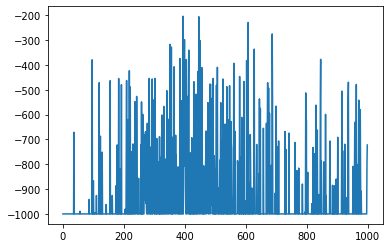

In [14]:
%matplotlib inline
plt.plot(episode_reward_lst)
plt.show()

In [18]:
agent.main_critic.model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 2)            8           input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          384         batch_normalization_1[0][0]      
____________________________________________________________________________________________